<a href="https://colab.research.google.com/github/tejaswi1995prakash/Supply-Chain/blob/master/Supply_Chain_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
%cd /gdrive/My\ Drive/Colab\ Notebooks/

/gdrive/My Drive/Colab Notebooks


!mkdir SupplyChainManagement

In [0]:
%cd SupplyChainManagement/

/gdrive/My Drive/Colab Notebooks/SupplyChainManagement


In [0]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/8gx2fvg2k6-5.zip

--2020-05-13 10:56:17--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/8gx2fvg2k6-5.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.60.24
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.60.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26168801 (25M) [application/octet-stream]
Saving to: ‘8gx2fvg2k6-5.zip.2’

8gx2fvg2k6-5.zip.2  100%[===================>]  24.96M  6.00MB/s    in 4.2s    

2020-05-13 10:56:22 (6.00 MB/s) - ‘8gx2fvg2k6-5.zip.2’ saved [26168801/26168801]



In [0]:
!unzip 8gx2fvg2k6-5.zip

Archive:  8gx2fvg2k6-5.zip
replace tokenized_access_logs.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace DataCoSupplyChainDataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace DescriptionDataCoSupplyChain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Importing Libraries


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
tokens = pd.read_csv('tokenized_access_logs.csv')
data = pd.read_csv('DataCoSupplyChainDataset.csv',encoding= 'latin')
description = pd.read_csv('DescriptionDataCoSupplyChain.csv')

Dataset display

In [0]:
tokens.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [0]:
data = data.drop( columns = ['Customer Email','Customer Fname','Customer Lname','Customer Password','Order Zipcode','Product Image'])
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,day,month,year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,Wednesday,January,2018
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,Saturday,January,2018
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,NaN,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,Saturday,January,2018
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,NaN,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,Saturday,January,2018
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,NaN,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,Saturday,January,2018


In [0]:
description.head()

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer


**Basic Exploratory Data Analysis**

In [0]:
avg_by_dept = data.groupby('Department Name')['Benefit per order'].agg(['sum','mean'])
avg_by_dept = avg_by_dept.reset_index()
dept = avg_by_dept['Department Name'].array
avg_val_dept = avg_by_dept['mean'].array
avg_by_dept


,Department Name,sum,mean
0,Apparel,8.818829e+05,17.998345
1,Book Shop,8.830100e+02,2.180272
2,Discs Shop,2.419312e+04,11.941323
3,Fan Shop,1.834155e+06,27.432366
4,Fitness,4.653806e+04,18.772917
5,Footwear,4.102225e+05,28.242513
6,Golf,4.975236e+05,14.976627
7,Health and Beauty,9.493630e+03,26.225497
8,Outdoors,1.452515e+05,14.996021
9,Pet Shop,3.589260e+03,7.295244


Text(0, 0.5, 'Amount')

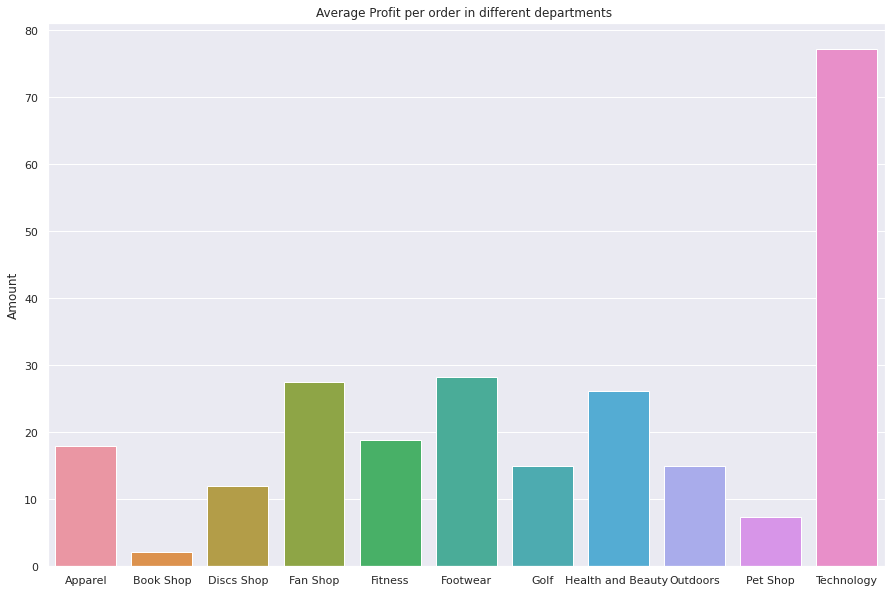

In [0]:
plt.figure(figsize=(15,10))
plt.title("Average Profit per order in different departments ")
sns.barplot(x= dept, y= avg_val_dept)
plt.ylabel("Amount")

The average profit per order across various department is as shown. It is of no doubt that the Technology department is making the most profits across all domains. The book shop department has the lowest profit per order.

In [0]:
import datetime
data["order date (DateOrders)"] = pd.to_datetime(data['order date (DateOrders)'])

In [0]:
data['day'] = data['order date (DateOrders)'].map(lambda p: p.strftime('%A'))
data['month'] = data['order date (DateOrders)'].map(lambda p : p.strftime("%B"))
data['year'] = data['order date (DateOrders)'].map(lambda p: p.year)

In [0]:
avg_sales_year = data.groupby('year')[['Order Item Total']].sum().reset_index()
avg_sales_year['Order Item Total']

0    1.108954e+07
1    1.105600e+07
2    1.061091e+07
3    2.979521e+05
Name: Order Item Total, dtype: float64

Text(0, 0.5, 'Revenue')

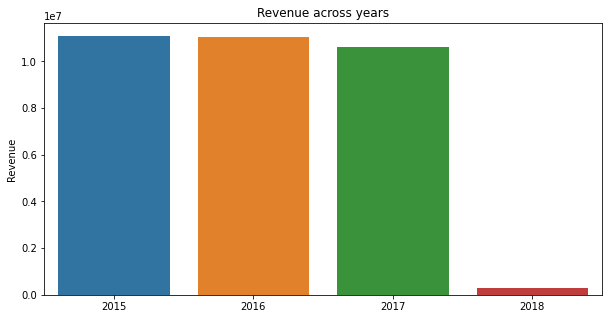

In [0]:
plt.figure(figsize=(10,5))
plt.title("Revenue across years")
sns.barplot(x= ['2015','2016','2017','2018'], y= avg_sales_year['Order Item Total'])
plt.ylabel("Revenue")

The revenues in the year 2018 has decreased phenomenoally. The reason behind such poor revenues is unknown at this stage. 

In [0]:
sales_day = data.groupby('day')[['Order Item Total']].sum().reset_index()
sales_day

,day,Order Item Total
0,Friday,4.769770e+06
1,Monday,4.741154e+06
2,Saturday,4.834817e+06
3,Sunday,4.760610e+06
4,Thursday,4.707238e+06
5,Tuesday,4.671602e+06
6,Wednesday,4.569211e+06


Text(0, 0.5, 'Revenue')

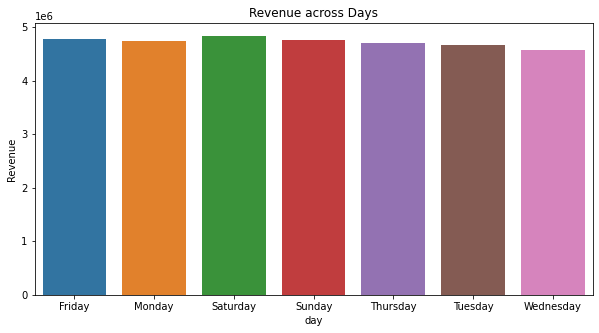

In [0]:
plt.figure(figsize=(10,5))
plt.title("Revenue across Days")
sns.barplot(x= sales_day['day'], y= sales_day['Order Item Total'])
plt.ylabel("Revenue")

We can see a unifrom distribution of sales across all days in a week and there is no drastic changes.

In [0]:
d1 = data.groupby('Order Country')[['Sales']].count().reset_index().sort_values('Sales',ascending = False).head(10)
country = d1['Order Country'].array
d1

,Order Country,Sales
48,Estados Unidos,24840
53,Francia,13222
102,México,13172
2,Alemania,9564
8,Australia,8497
20,Brasil,7987
120,Reino Unido,7302
31,China,5758
75,Italia,4989
69,India,4783


Text(0, 0.5, 'Number of Orders')

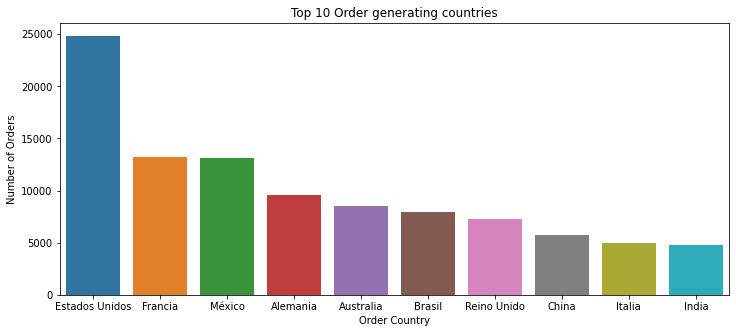

In [0]:
plt.figure(figsize=(12,5))
plt.title("Top 10 Order generating countries")
sns.barplot(x= d1['Order Country'], y= d1['Sales'])
plt.ylabel("Number of Orders")

The orders are placed from 164 different countries and the top 10 countries which place the most orders are as shown above.

In [0]:
ctab = pd.crosstab(data['Shipping Mode'],data['Delivery Status'])
ctab

Delivery Status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
Shipping Mode,,,,
First Class,0,26513,1301,0
Same Day,0,4454,444,4839
Second Class,0,26987,1410,6819
Standard Class,41592,41023,4599,20538
